In [1]:
import os
import sys
import json
import pandas as pd
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
TOP_PATH = os.environ['PWD']

In [4]:
sys.path.append(TOP_PATH + '/config')
sys.path.append(TOP_PATH + '/src')

In [5]:
os.getcwd()

'/Users/tevansbarton/DSC180B/Fair-Policing-Capstone/notebooks'

In [6]:
sys.path

['/Users/tevansbarton/DSC180B/Fair-Policing-Capstone/notebooks',
 '/opt/anaconda3/lib/python37.zip',
 '/opt/anaconda3/lib/python3.7',
 '/opt/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/opt/anaconda3/lib/python3.7/site-packages',
 '/opt/anaconda3/lib/python3.7/site-packages/aeosa',
 '/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/tevansbarton/.ipython',
 '/Users/tevansbarton/DSC180B/Fair-Policing-Capstone/config',
 '/Users/tevansbarton/DSC180B/Fair-Policing-Capstone/src']

In [10]:
from trends import *
import etl
from get_date_range_df import get_data_from_range
import eda_viz

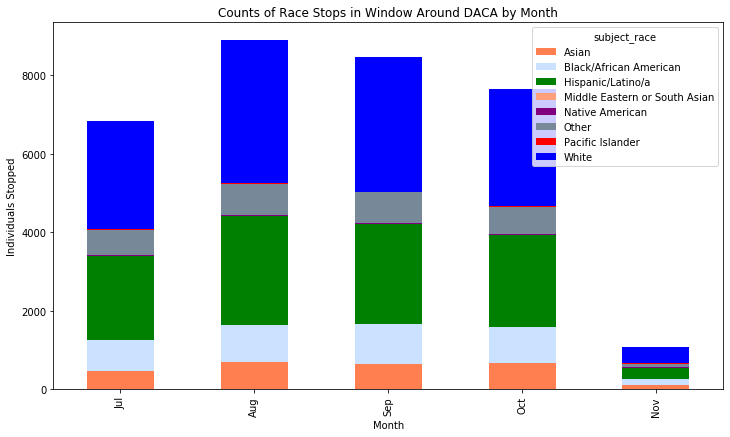

In [47]:
eda_viz.month_race_count_viz(('07-05-2017', '11-05-2017'), 'DACA', save_fig = True)

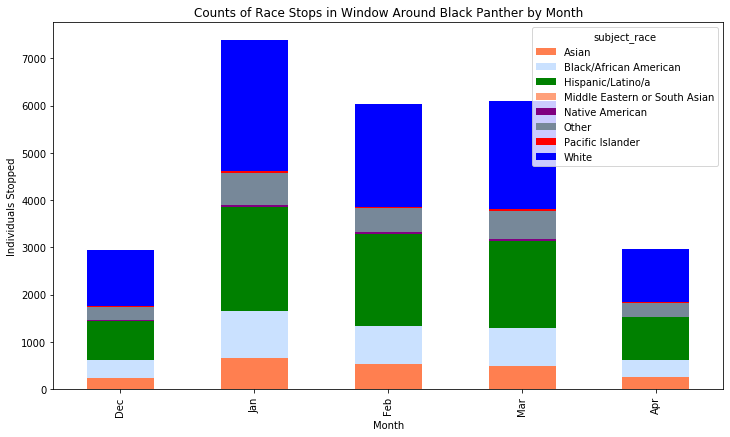

In [48]:
eda_viz.month_race_count_viz(('12-16-2017', '04-16-2018'), 'Black Panther', save_fig = True)

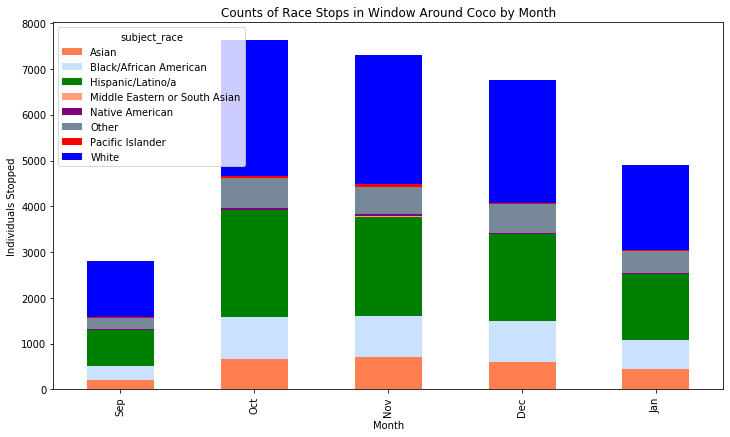

In [49]:
eda_viz.month_race_count_viz(('09-22-2017', '01-22-2018'), 'Coco', save_fig = True)

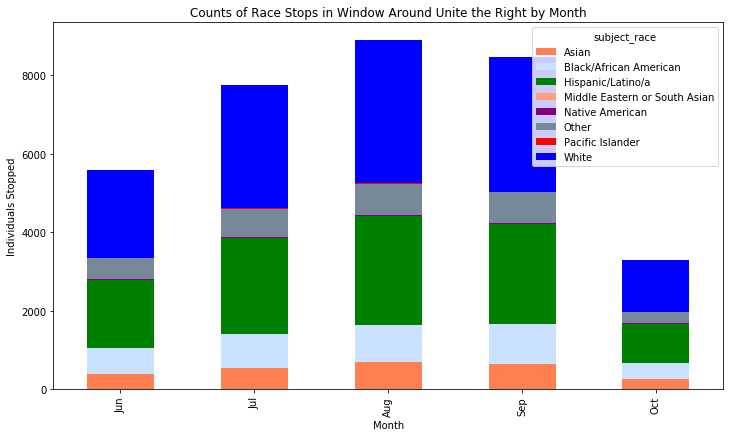

In [50]:
eda_viz.month_race_count_viz(('06-12-2017', '10-12-2017'), 'Unite the Right', save_fig = True)

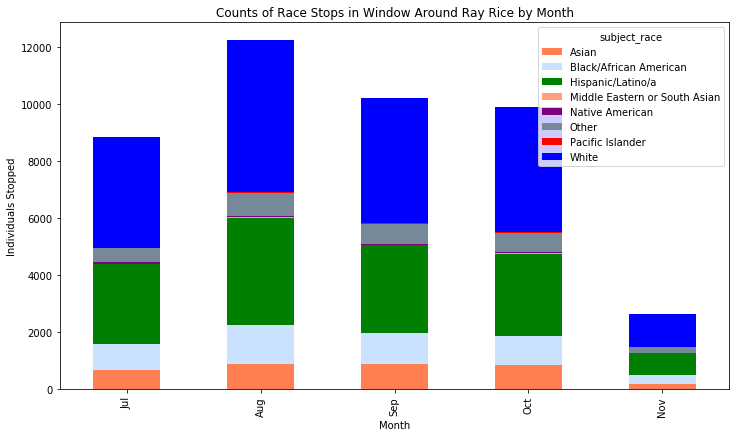

In [51]:
eda_viz.month_race_count_viz(('07-08-2014', '11-08-2014'), 'Ray Rice', save_fig = True)

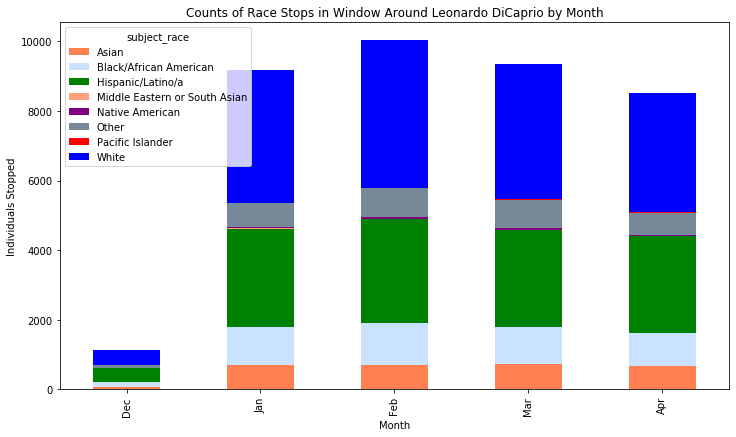

In [52]:
eda_viz.month_race_count_viz(('12-28-2015', '04-28-2016'), 'Leonardo DiCaprio', save_fig = True)

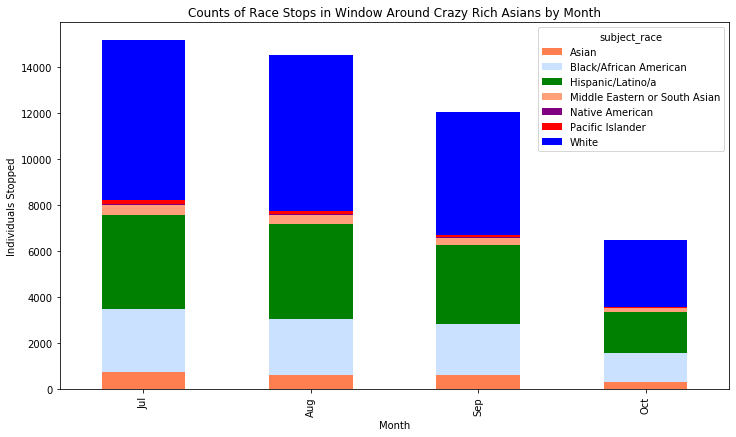

In [53]:
eda_viz.month_race_count_viz(('06-15-2018', '10-15-2018'), 'Crazy Rich Asians', save_fig = True)

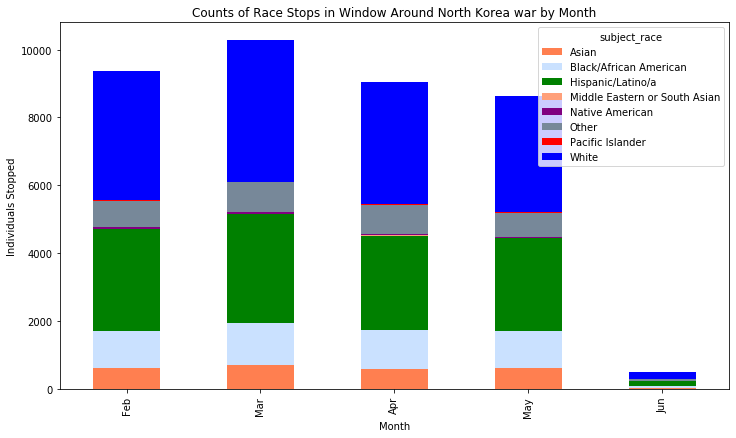

In [54]:
eda_viz.month_race_count_viz(('02-01-2017', '06-01-2017'), 'North Korea war', save_fig = True)